In [1]:
# Modules
import sys
import json
# Tested module
sys.path.append("/home/simon/Documents/REPO/Exact_laws")
sys.path.append("/home/simon/Documents/REPO/Simu/Rapport_simu_quantities")

from quantities_analysis import *
from exact_laws.preprocessing.quantities import QUANTITIES
from exact_laws.preprocessing.process_on_oca_files import from_OCA_files_to_standard_h5_file,extract_quantities_from_OCA_file
from exact_laws.preprocessing.process_on_standard_h5_file import describ_file,extract_quantities_from_h5_file

import os
import numpy as np
import numexpr as ne
import h5py as h5
import plotly.graph_objects as go
from scipy.optimize import curve_fit

# Matplotlib config
%matplotlib widget

plt.rcParams['text.usetex'] = True
rc('xtick', labelsize=25) 
rc('ytick', labelsize=25) 
rc('font', size=22)

numfig = 0

In [103]:
with open("/home/simon/Documents/REPO/Simu/descript_oca_simu.json","r") as f:
    simu = json.load(f)['CGL6']['2730.000']

In [104]:
simu

{'original_folder': '/home/simon/Documents/DATA/SIMULATIONS/OCA/data_simus_oca/CGL6/CGL6_2730/',
 'cycle': 'cycle_0',
 'group_grid': '3Dgrid',
 'N': [512, 512, 1024],
 'kdi': 0.14705882352941177,
 'theta': 1.309017176581171,
 'thrsh_forc_hi': 0.016,
 'thrsh_forc_lo': 0.015,
 'a1_forc': 0.5,
 'act_forc': True,
 'nu': 3e-11,
 'eta': 3e-11,
 'hdiss_rho': 0,
 'hdiss_p': 3e-12,
 'an_hd': 5,
 'ap0': 4,
 'B0': [0, 0, 1],
 'beta0': 1,
 'name': 'CGL6.2730.000',
 'EL_red1D': ['/home/simon/Documents/DATA/SIMULATIONS/OCA/runs/CGL6.2730.0/OCA_CGL6.2730.0_alli_EL_lincart_all_red1D.h5',
  '/home/simon/Documents/DATA/SIMULATIONS/OCA/runs/CGL6.2730.0/OCA_CGL6.2730.0_alleq_EL_lincart_all_red1D.h5',
  '/home/simon/Documents/DATA/SIMULATIONS/OCA/runs/CGL6.2730.0/OCA_CGL6.2730.0_allkhm_EL_lincart_all_red1D.h5'],
 'EL_red2D': ['/home/simon/Documents/DATA/SIMULATIONS/OCA/runs/CGL6.2730.0/OCA_CGL6.2730.0_alli_EL_lincart_all_red2D.h5',
  '/home/simon/Documents/DATA/SIMULATIONS/OCA/runs/CGL6.2730.0/OCA_CGL6.273

In [105]:
# Paths 
#path_record_images = "./OCA_"+simu['name']+"_analysis/"
#if not os.path.exists(path_record_images) : os.mkdir(path_record_images)
path_data_record = f"/home/simon/Documents/DATA/SIMULATIONS/OCA/Quantities_analysis/OCA_{simu['name']}_analysis/"
if not os.path.exists(path_data_record) : os.mkdir(path_data_record)

In [106]:
# Creat a standard h5 file with quantities of interest
name = f"OCA_{simu['name']}_analysis_v2"
sim_type = f"OCA_{simu['name'][:5]}"
laws = []
terms = []
quantities = ['rho','Ipm','Ipgyr'] #
physical_params = {'gamma':5/3}
reduction = 1

path_data_file = from_OCA_files_to_standard_h5_file(
    simu['original_folder'], path_data_record, name, simu['cycle'], laws, terms, quantities, sim_type, physical_params, reduction)
print('File: ', path_data_file)
print('Quantities: ', quantities)

File:  /home/simon/Documents/DATA/SIMULATIONS/OCA/Quantities_analysis/OCA_CGL6.2730.000_analysis//OCA_CGL6.2730.000_analysis_v2.h5
Quantities:  ['rho', 'Ipm', 'Ipgyr']


In [5]:
ppar, pperp, pm = extract_quantities_from_h5_file(path_data_file,['Ippar','Ipperp','Ipm'])
ap = ne.evaluate('pperp/ppar')
ap = np.where(ppar<=0,np.nan,ap)

In [8]:
ppar2, pperp2, pm2 = extract_quantities_from_h5_file(path_data_file,['Ippar','Ipperp','Ipm'])
ap = ne.evaluate('pperp/ppar')
ap = np.where(ppar<=0,np.nan,ap)

In [6]:
# Diagram instability criteria
dic_displ = {}
dic_displ['numfig'] = 11
dic_displ['title'] = f"Diagram instability criteria OCA {simu['name']}"
dic_displ['xlabel'] = '$\\beta_{\parallel}$'
dic_displ['ylabel'] = '$a_p$'
dic_displ['clabel'] = 'Nb points'
X = ne.evaluate('ppar/pm').flatten()
Y = ap.flatten()
cond = (pm*ppar).flatten()
dic_displ['x'] = np.where(cond<=0,0,X)
dic_displ['y'] = np.where(cond<=0,0,Y)
dic_displ['xlim'] = (0,4)
dic_displ['ylim'] = (0,7)

dic_displ['lines_to_draw'] = []
x=np.linspace(0.01,10,1000)
dic_displ['lines_to_draw'].append({'data':{'x':x,'y':ne.evaluate('1-2/x')},'color':'r','label':'firehose MHD-CGL \n [Hunana 2019]'})
dic_displ['lines_to_draw'].append({'data':{'x':x,'y':ne.evaluate('1/2*(sqrt(1+4/x)+1)')},'color':'orange','label':'corrected mirror \n Th. Centre-guide \n [Kulsrud 1989]'})

dic_displ['lines_to_draw'].append({'data':{'x':x,'y':ne.evaluate('6/2*(sqrt(1+4/6/x)+1)')},'color':'coral','label':'fluid mirror [Hunana 2019] \n (au dessus de y=6)'})
dic_displ['lines_to_draw'].append({'data':{'x':x,'y':1+0.43/((x+0.0004)**0.42)},'color':'cyan','label':'proton cyclotron \n [Hellinger 2006]'})
dic_displ['lines_to_draw'].append({'data':{'x':x,'y':1+0.77/((x+0.016)**0.76)},'color':'green','label':'mirror \n [Hellinger 2006]'})
dic_displ['lines_to_draw'].append({'data':{'x':x,'y':1-0.47/((x-0.59)**0.53)},'color':'violet','label':'parallel firehose \n [Hellinger 2006]'})
dic_displ['lines_to_draw'].append({'data':{'x':x,'y':1-1.4/((x+0.11)**1)},'color':'magenta','label':'oblic firehose \n [Hellinger 2006]'})
dic_displ['legend'] = ({'loc':'center right', 'bbox_to_anchor':(1.6, 0.5)})
record_file = path_record_images+"fig_diag_data_"+simu['name']+"_instcrit.png"
display_graph(record_file=record_file, displ=False, rec=True, 
              funcfig = plotdiag, **dic_displ)


/tmp/ipykernel_121291/2023248802.py:24: RuntimeWarning: invalid value encountered in power
  dic_displ['lines_to_draw'].append({'data':{'x':x,'y':1-0.47/((x-0.59)**0.53)},'color':'violet','label':'parallel firehose \n [Hellinger 2006]'})
/tmp/ipykernel_121291/2023248802.py:24: RuntimeWarning: divide by zero encountered in true_divide
  dic_displ['lines_to_draw'].append({'data':{'x':x,'y':1-0.47/((x-0.59)**0.53)},'color':'violet','label':'parallel firehose \n [Hellinger 2006]'})


NameError: name 'path_record_images' is not defined

In [115]:
files = []
hs = []
xedgess = []
yedgess = []

In [116]:
files.append('/home/simon/Documents/DATA/SIMULATIONS/OCA/Quantities_analysis/OCA_CGL1.6700.0000_analysis//OCA_CGL1.6700.0000_analysis_v2.h5')
files.append('/home/simon/Documents/DATA/SIMULATIONS/OCA/Quantities_analysis/OCA_CGL2.12900.00_analysis//OCA_CGL2.12900.00_analysis_v2.h5')
#files.append('/home/simon/Documents/DATA/SIMULATIONS/OCA/Quantities_analysis/OCA_CGL3.357_analysis//OCA_CGL3.357_analysis.h5')
#files.append('/home/simon/Documents/DATA/SIMULATIONS/OCA/Quantities_analysis/OCA_CGL3.359_analysis//OCA_CGL3.359_analysis.h5')
files.append('/home/simon/Documents/DATA/SIMULATIONS/OCA/Quantities_analysis/OCA_CGL3Bf.410.0000_analysis//OCA_CGL3Bf.410.0000_analysis_v2.h5')
files.append('/home/simon/Documents/DATA/SIMULATIONS/OCA/Quantities_analysis/OCA_CGL3.361.0000_analysis//OCA_CGL3.361.0000_analysis_v2.h5')
#files.append('/home/simon/Documents/DATA/SIMULATIONS/OCA/Quantities_analysis/OCA_CGL3.362_analysis//OCA_CGL3.362_analysis.h5')

files.append('/home/simon/Documents/DATA/SIMULATIONS/OCA/Quantities_analysis/OCA_CGL5.12905.000_analysis//OCA_CGL5.12905.000_analysis_v2.h5')
files.append('/home/simon/Documents/DATA/SIMULATIONS/OCA/Quantities_analysis/OCA_CGL6.2730.000_analysis//OCA_CGL6.2730.000_analysis_v2.h5')
#files.append('/home/simon/Documents/DATA/SIMULATIONS/OCA/Quantities_analysis/OCA_CGL7.5000_analysis//OCA_CGL7.5000_analysis.h5')
#files.append('/home/simon/Documents/DATA/SIMULATIONS/OCA/Quantities_analysis/OCA_LF1.3420_analysis//OCA_LF1.3420_analysis_pe.h5')
#files.append('/home/simon/Documents/DATA/SIMULATIONS/OCA/Quantities_analysis/OCA_LF2.6580_analysis//OCA_LF2.6580_analysis_pe.h5')
#files.append('/home/simon/Documents/DATA/SIMULATIONS/OCA/Quantities_analysis/OCA_LF3.179.8_analysis//OCA_LF3.179.8_analysis_pe.h5')
#files.append('/home/simon/Documents/DATA/SIMULATIONS/OCA/Quantities_analysis/OCA_LF3.180.2_analysis//OCA_LF3.180.2_analysis_pe.h5')
#files.append('/home/simon/Documents/DATA/SIMULATIONS/OCA/Quantities_analysis/OCA_LF4.17850_analysis//OCA_LF4.17850_analysis_pe.h5')


In [30]:
path_data_file = '/home/simon/Documents/DATA/SIMULATIONS/OCA/Quantities_analysis/OCA_CGL6.2730.000_analysis//OCA_CGL6.2730.000_analysis.h5'
ppar, pperp, pm = extract_quantities_from_h5_file(path_data_file,['Ippar','Ipperp','Ipm'])
print(np.mean(ppar),np.mean(pperp),np.mean(pm))
print(np.std(ppar),np.std(pperp),np.std(pm))
print(np.max(ppar),np.max(pperp),np.std(pm))
ap = ne.evaluate('pperp/ppar')
print(np.mean(ap),ap_inf1,ap_sup1)
ap = np.where(ppar<=0,np.nan,ap)
ap_inf1 = np.count_nonzero(ap < 1)/np.size(ap)*100
ap_sup1 = np.count_nonzero(ap > 1)/np.size(ap)*100
print(np.mean(ap),ap_inf1,ap_sup1)
betap = ne.evaluate('ppar/pm').flatten()
print("betap : ",np.mean(betap),np.std(betap),np.min(betap),np.max(betap))

0.5090895993934711 1.9952219397235345 0.5053594361629911
0.05817205035612861 0.03769434134778583 0.03362926880444515
0.9554220742827778 2.188743949030746 0.03362926880444515
3.97182436787382 0.0 100.0
3.97182436787382 0.0 100.0
betap :  1.014237431405144 0.15082612926890512 0.2312380491958915 2.4284177815823487


In [ ]:
path_data_file = '/home/simon/Documents/DATA/SIMULATIONS/OCA/Quantities_analysis/OCA_CGL6.2730.000_analysis//OCA_CGL6.2730.000_analysis.h5'
ppar, pperp, pm = extract_quantities_from_h5_file(path_data_file,['Ippar','Ipperp','Ipm'])
print(np.mean(ppar),np.mean(pperp),np.mean(pm))
print(np.std(ppar),np.std(pperp),np.std(pm))
print(np.max(ppar),np.max(pperp),np.max(pm))
ap = ne.evaluate('pperp/ppar')
print(np.max(ap))
ap = np.where(ppar<=0,np.nan,ap)
ap_inf1 = np.count_nonzero(ap < 1)/np.size(ap)*100
ap_sup1 = np.count_nonzero(ap > 1)/np.size(ap)*100
print(np.mean(ap),ap_inf1,ap_sup1)
betap = ne.evaluate('ppar/pm').flatten()
print("betap : ",np.mean(X),np.std(X),np.min(X),np.max(X))

0.5090895993934711 1.9952219397235345 0.5053594361629911
0.05817205035612861 0.03769434134778583 0.03362926880444515
0.9554220742827778 2.188743949030746 0.6763193954011578
18.509602398751962
3.97182436787382 0.0 100.0


NameError: name 'X' is not defined

In [117]:
for i,path_data_file in enumerate(files) :
    print(path_data_file)
    rho = np.array(extract_quantities_from_h5_file(path_data_file,['rho']))
    X = np.sort(rho.flatten())
    print("rho : ",np.mean(X),np.std(X),np.min(X),np.max(X))
    # del(rho)
    ppar, pperp, pm = extract_quantities_from_h5_file(path_data_file,['Ippar','Ipperp','Ipm'])
    X = np.sort(ne.evaluate('ppar/pm').flatten())
    print("betap : ",np.mean(X),np.std(X),np.min(X),np.max(X))
    X = np.sort(ne.evaluate('pperp/ppar').flatten())
    print("ap : ",np.mean(X),np.std(X),np.min(X),np.max(X))
    X = np.sort(ne.evaluate('(ppar+2*pperp)/3/pm').flatten())
    print("betai : ",np.mean(X),np.std(X),np.min(X),np.max(X))
    X = np.sort(ne.evaluate('((ppar+2*pperp)/3+rho)/pm').flatten())
    print("beta : ",np.mean(X),np.std(X),np.min(X),np.max(X))
    ap = ne.evaluate('pperp/ppar')
    betap = ne.evaluate('ppar/pm').flatten()
    # ppare, pperpe = extract_quantities_from_h5_file(path_data_file,['Ipepar','Ipeperp'])
    # Xe = ppare
    # print("ppare : ",np.mean(Xe),np.std(Xe),np.min(Xe),np.max(Xe))
    # Xe = pperpe
    # print("pperpe : ",np.mean(X),np.std(X),np.min(X),np.max(X))
    # ape = ne.evaluate('pperpe/ppare')
    # print("ape : ",np.mean(ape),np.std(ape),np.min(ape),np.max(ape))
    # Xe = ne.evaluate('ppare/pm').flatten()
    # print("betape : ",np.mean(Xe),np.std(Xe),np.min(Xe),np.max(Xe))
    X = betap
    ap = np.where(ppar<=0,np.nan,ap)
    ap_inf1 = np.count_nonzero(ap < 1)/np.size(ap)*100
    ap_sup1 = np.count_nonzero(ap > 1)/np.size(ap)*100
    print(ap_inf1,ap_sup1)
    Y = ap.flatten()
    cond = (pm*ppar).flatten()
    x = np.where(cond<=0,0,X)
    y = np.where(cond<=0,0,Y)
    h, xedges, yedges, _ = plt.hist2d(x.flatten(),y.flatten(),bins=500,cmap='nipy_spectral',visible=False) 
    hs.append(h)
    xedgess.append(xedges)
    yedgess.append(yedges)

/home/simon/Documents/DATA/SIMULATIONS/OCA/Quantities_analysis/OCA_CGL1.6700.0000_analysis//OCA_CGL1.6700.0000_analysis_v2.h5
rho :  0.9999999999999881 0.018058915467379102 0.8252308567121912 1.127505520616503
betap :  0.9274231964113647 0.08506161487569146 0.3974953417262441 1.772159325803763
ap :  1.1060712073111352 0.08360475903563838 0.5931539718041656 1.9377461421990512
betai :  0.9898443471873689 0.06839125718731492 0.5217545078488215 1.6239599129326532
beta :  2.962692577295265 0.18393886643956858 1.6875729078128463 4.621897613628788
9.06464084982872 90.93535915017128
/home/simon/Documents/DATA/SIMULATIONS/OCA/Quantities_analysis/OCA_CGL2.12900.00_analysis//OCA_CGL2.12900.00_analysis_v2.h5
rho :  0.9999999999999746 0.016737947483945394 0.8842532287776622 1.087480894354019
betap :  0.9315699132008769 0.08440817713172953 0.4674165470762362 1.461124688111767
ap :  1.1060589617815038 0.09531053532766574 0.7090241130559813 1.8995634294514687
betai :  0.993356055772968 0.0593172671982

KeyboardInterrupt: 

In [ ]:
lines_to_draw = []
x=np.linspace(0.01,10,1000)
lines_to_draw.append({'data':{'x':x,'y':ne.evaluate('1-2/x')},'color':'r','linestyle':'-.','label':'firehose threshold'}) #[Hunana 2019]
#lines_to_draw.append({'data':{'x':x,'y':ne.evaluate('1/2*(sqrt(1+4/x)+1)')},'color':'cyan','linestyle':'-.','label':'critère miroir cinétique'}) #\n Th. Centre-guide \n [Kulsrud 1989]'})
#lines_to_draw.append({'data':{'x':x,'y':ne.evaluate('6/2*(sqrt(1+4/6/x)+1)')},'color':'coral','linestyle':'-.','label':'CGL mirror threshold'}) # [Hunana 2019] 
#lines_to_draw.append({'data':{'x':x,'y':1+0.43/((x+0.0004)**0.42)},'color':'cyan','label':'proton cyclotron H06'}) #\n [Hellinger 2006]'})
#lines_to_draw.append({'data':{'x':x,'y':1+0.77/((x+0.016)**0.76)},'color':'green','label':'mirror H06'}) # \n [Hellinger 2006]'})
#lines_to_draw.append({'data':{'x':x,'y':1-0.47/((x-0.59)**0.53)},'color':'violet','label':'parallel firehose H06'}) # \n [Hellinger 2006]'})

betae = 1/2*1*2/1
#lines_to_draw.append({'data':{'x':x,'y':ne.evaluate('1/(2*(betae/2/x+1))*(sqrt(1+4/x*(1+betae/2/x*(3+betae/x+betae/2+x)))+1)')},'color':'blue','label':'electronic mirror'})
#lines_to_draw.append({'data':{'x':x,'y':ne.evaluate('(x*x+sqrt(x*x*x*x+4*x*(x+1/2)*(x/2+1)))/(2*x*(x+1/2))')},'color':'blue','linestyle':'-.','label':'critère miroir avec électrons'})
#betae = 1/2*1*2/1
lines_to_draw.append({'data':{'x':x,'y':ne.evaluate('6/2*(sqrt(1+4/6/x*(1+betae/2+betae/3/x))+1)')},'color':'blue','linestyle':'-.','label':'mirror threshold'})
##lines_to_draw.append({'data':{'x':x,'y':ne.evaluate('3+sqrt(9+6/x*(1+betae/2+betae/3/x))')},'color':'blue','linestyle':'-.','label':'critère miroir'})
#lines_to_draw.append({'data':{'x':x,'y':1-1.4/((x+0.11)**1)},'color':'magenta','label':'oblic firehose H06'}) # \n [Hellinger 2006]'})


/home/simon/Documents/DATA/SIMULATIONS/OCA/Quantities_analysis/OCA_CGL1.6700.0000_analysis//OCA_CGL1.6700.0000_analysis_v2.h5
/home/simon/Documents/DATA/SIMULATIONS/OCA/Quantities_analysis/OCA_CGL2.12900.00_analysis//OCA_CGL2.12900.00_analysis_v2.h5
/home/simon/Documents/DATA/SIMULATIONS/OCA/Quantities_analysis/OCA_CGL3Bf.410.0000_analysis//OCA_CGL3Bf.410.0000_analysis_v2.h5


/tmp/ipykernel_121291/4197423013.py:13: UserWarning: The following kwargs were not used by contour: 'label'
  contours = plt.contour(xedgess[i][1:],yedgess[i][1:],np.transpose(hs[i]/np.max(hs[i])),[1/np.max(hs[i]),0.5,0.99],colors=color[i],label=label[i])


/home/simon/Documents/DATA/SIMULATIONS/OCA/Quantities_analysis/OCA_CGL3.361.0000_analysis//OCA_CGL3.361.0000_analysis_v2.h5
/home/simon/Documents/DATA/SIMULATIONS/OCA/Quantities_analysis/OCA_CGL5.12905.000_analysis//OCA_CGL5.12905.000_analysis_v2.h5
/home/simon/Documents/DATA/SIMULATIONS/OCA/Quantities_analysis/OCA_CGL6.2730.000_analysis//OCA_CGL6.2730.000_analysis_v2.h5


/tmp/ipykernel_121291/4197423013.py:17: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  plt.plot('x','y',**line)


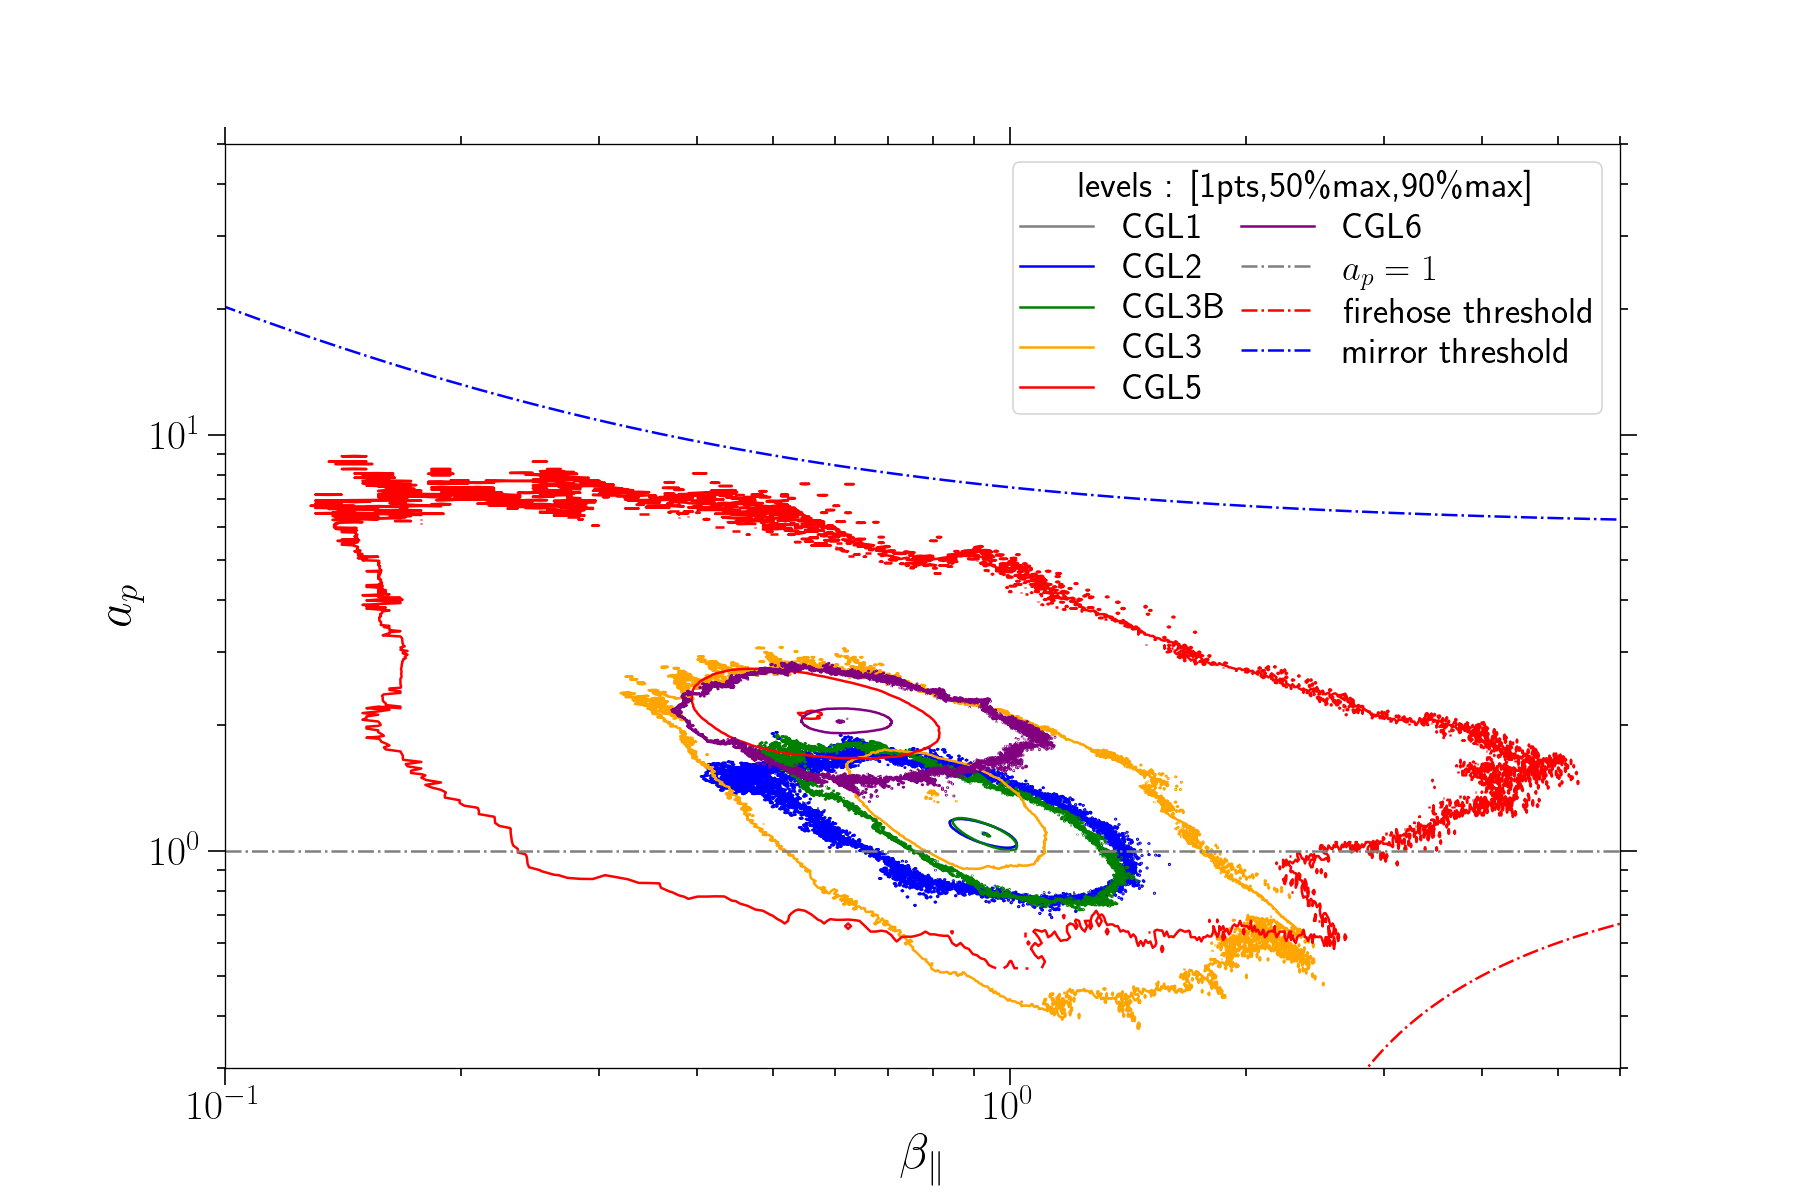

In [ ]:
plt.figure(2,figsize=(15,10))
plt.clf()

#color = ['red','black','green','blue','orange','purple','pink','grey',]
color = ['grey','blue','green','orange','red','purple']
#color = ['blue','orange']
label =['CGL1','CGL2','CGL3B','CGL3','CGL5','CGL6'] #['LF1','LF2','LF3','LF3']#['CGL1','CGL2','CGL3','CGL3B','CGL5','CGL6','CGL7']
#label = ['CGL1.6600','CGL2.12800','CGL3.361','CGL5.12905','CGL6.60000','CGL7.5000']
#label = ['LF2','LF3']
#label = ['LF1','LF2','LF3','LF4']
for i in range(len(files)) :
    print(files[i])
    contours = plt.contour(xedgess[i][1:],yedgess[i][1:],np.transpose(hs[i]/np.max(hs[i])),[1/np.max(hs[i]),0.5,0.99],colors=color[i],label=label[i])
    plt.plot([10,12],[0,1],color[i],label=label[i]) #,
plt.axhline(1,linestyle='-.',color='grey',label='$a_{p} = 1$')
for line in lines_to_draw :
    plt.plot('x','y',**line)

plt.xlim(1e-1,6)
plt.ylim(3e-1,5e1)#5
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\\beta_{\parallel}$',fontsize=30)
plt.ylabel('$a_{p}$',fontsize=30)
axes = plt.gca()
axes.yaxis.set_tick_params(length = 10, width = 1,
                           right = True, left = True, which = 'major',)
axes.yaxis.set_tick_params(length = 5, width = 1,
                           right = True, left = True, which = 'minor',)
axes.xaxis.set_tick_params(length = 10, width = 1,
                           right = True, left = True, which = 'major',)
axes.xaxis.set_tick_params(length = 5, width = 1,
                           right = True, left = True, which = 'minor',)
plt.legend(loc='upper right',title='levels : [1pts,50\%max,90\%max]',ncol=2,columnspacing=0.4,labelspacing = 0.2,borderpad=0.2) #1pts,
#plt.legend(bbox_to_anchor=(1,0.5))
plt.show()
plt.savefig('./brazil.svg')

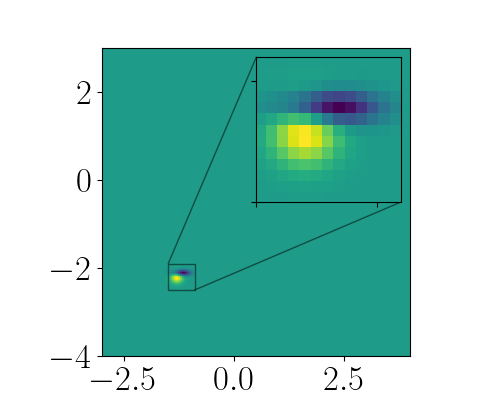

In [2]:
from matplotlib import cbook
import matplotlib.pyplot as plt
import numpy as np


def get_demo_image():
    z = cbook.get_sample_data("axes_grid/bivariate_normal.npy", np_load=True)
    # z is a numpy array of 15x15
    return z, (-3, 4, -4, 3)

fig, ax = plt.subplots(figsize=[5, 4])

# make data
Z, extent = get_demo_image()
Z2 = np.zeros((150, 150))
ny, nx = Z.shape
Z2[30:30+ny, 30:30+nx] = Z

ax.imshow(Z2, extent=extent, origin="lower")

# inset axes....
axins = ax.inset_axes([0.5, 0.5, 0.47, 0.47])
axins.imshow(Z2, extent=extent, origin="lower")
# subregion of the original image
x1, x2, y1, y2 = -1.5, -0.9, -2.5, -1.9
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels([])
axins.set_yticklabels([])

ax.indicate_inset_zoom(axins, edgecolor="black")

plt.show()

In [48]:
128*128*256

4194304

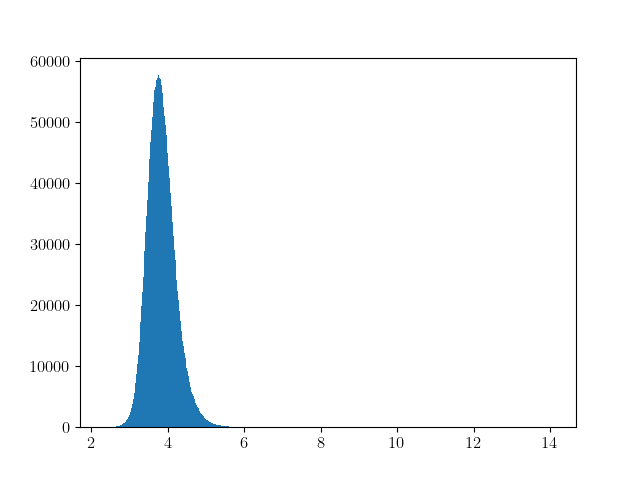

In [52]:
plt.figure(5)
plt.hist(ap.flatten(),bins=1000)
plt.show()

In [3]:
files = []
hists = []
hists_p = []
hists_bp = []
edgess = []
edgess_p = []
edgess_bp = []

In [5]:
files = []
files.append('/home/simon/Documents/DATA/SIMULATIONS/OCA/Quantities_analysis/OCA_CGL1.6700.0000_analysis//OCA_CGL1.6700.0000_analysis_v2.h5')
files.append('/home/simon/Documents/DATA/SIMULATIONS/OCA/Quantities_analysis/OCA_CGL2.12900.00_analysis//OCA_CGL2.12900.00_analysis_v2.h5')
#files.append('/home/simon/Documents/DATA/SIMULATIONS/OCA/Quantities_analysis/OCA_CGL3.357_analysis//OCA_CGL3.357_analysis.h5')
#files.append('/home/simon/Documents/DATA/SIMULATIONS/OCA/Quantities_analysis/OCA_CGL3.359_analysis//OCA_CGL3.359_analysis.h5')
files.append('/home/simon/Documents/DATA/SIMULATIONS/OCA/Quantities_analysis/OCA_CGL3Bf.410.0000_analysis//OCA_CGL3Bf.410.0000_analysis_v2.h5')
files.append('/home/simon/Documents/DATA/SIMULATIONS/OCA/Quantities_analysis/OCA_CGL3.361.0000_analysis//OCA_CGL3.361.0000_analysis_v2.h5')
#files.append('/home/simon/Documents/DATA/SIMULATIONS/OCA/Quantities_analysis/OCA_CGL3.362_analysis//OCA_CGL3.362_analysis.h5')

files.append('/home/simon/Documents/DATA/SIMULATIONS/OCA/Quantities_analysis/OCA_CGL5.12905.000_analysis//OCA_CGL5.12905.000_analysis_v2.h5')
files.append('/home/simon/Documents/DATA/SIMULATIONS/OCA/Quantities_analysis/OCA_CGL6.2730.000_analysis//OCA_CGL6.2730.000_analysis_v2.h5')
#files.append('/home/simon/Documents/DATA/SIMULATIONS/OCA/Quantities_analysis/OCA_CGL7.5000_analysis//OCA_CGL7.5000_analysis.h5')
#files.append('/home/simon/Documents/DATA/SIMULATIONS/OCA/Quantities_analysis/OCA_LF1.3420_analysis//OCA_LF1.3420_analysis_pe.h5')
#files.append('/home/simon/Documents/DATA/SIMULATIONS/OCA/Quantities_analysis/OCA_LF2.6580_analysis//OCA_LF2.6580_analysis_pe.h5')
#files.append('/home/simon/Documents/DATA/SIMULATIONS/OCA/Quantities_analysis/OCA_LF3.179.8_analysis//OCA_LF3.179.8_analysis_pe.h5')
#files.append('/home/simon/Documents/DATA/SIMULATIONS/OCA/Quantities_analysis/OCA_LF3.180.2_analysis//OCA_LF3.180.2_analysis_pe.h5')
#files.append('/home/simon/Documents/DATA/SIMULATIONS/OCA/Quantities_analysis/OCA_LF4.17850_analysis//OCA_LF4.17850_analysis_pe.h5')


In [8]:
for i,path_data_file in enumerate(files) :
    print(i)
    ppar, pperp, pm = extract_quantities_from_h5_file(path_data_file,['Ippar','Ipperp','Ipm'])
    ap = ne.evaluate('pperp/ppar')
    ap = np.where(ppar<=0,np.nan,ap)
    h, e = np.histogram(ap.flatten(), bins='auto')
    hists.append(h)
    edgess.append(e)
    dp = ne.evaluate('pperp-ppar')
    h, e = np.histogram(dp.flatten(), bins='auto')
    hists_p.append(h)
    edgess_p.append(e)
    bp = ne.evaluate('ppar/pm*(1-ap)')
    h, e = np.histogram(bp.flatten(), bins='auto')
    hists_bp.append(h)
    edgess_bp.append(e)

0
1
2
3
4
5


In [13]:
edgess_bp[5]

array([-4.50478785, -4.50378423, -4.50278061, ..., -1.57623789,
       -1.57523427, -1.57423066])

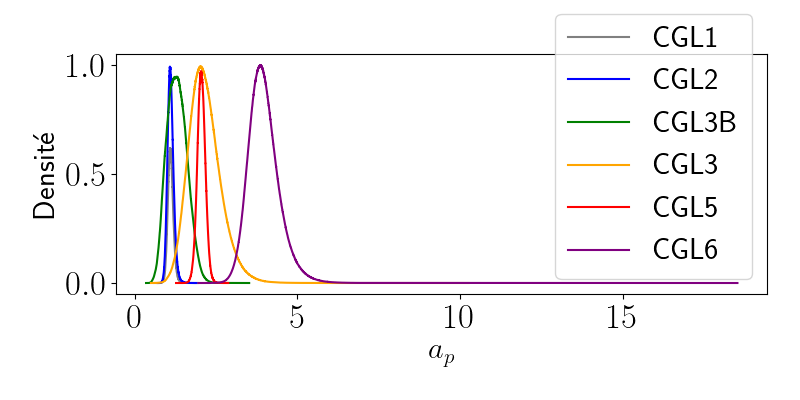

In [17]:
plt.figure(10,figsize=(8,4))
plt.clf()
labels = ['CGL1','CGL2','CGL3B','CGL3','CGL5','CGL6']
color = ['grey','blue','green','orange','red','purple']
for i,_ in enumerate(files):
    plt.plot((edgess[i][:-1]+edgess[i][1:])/2,hists[i]/np.max(hists[-1]),color=color[i],label=labels[i])
plt.xlabel('$a_p$')
plt.ylabel('Densité')
#plt.xlim(0,10)
plt.legend()
plt.tight_layout()
plt.show()

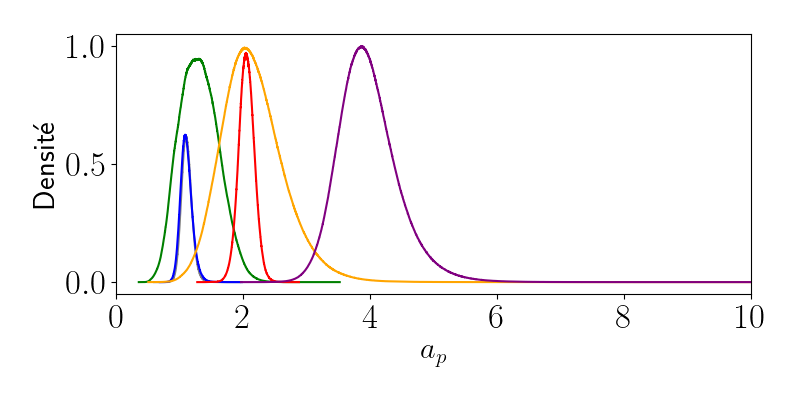

In [27]:
plt.figure(2,figsize=(8,4))
plt.clf()
labels = ['CGL1','CGL2','CGL3B','CGL3','CGL5','CGL6']
color = ['grey','blue','green','orange','red','purple']
for i,_ in enumerate(files):
    plt.plot((edgess[i][:-1]+edgess[i][1:])/2,hists[i]/np.max(hists[-1]),color=color[i],label=labels[i])
plt.xlabel('$a_p$')
plt.ylabel('Densité')
plt.xlim(0,10)
#plt.legend()
plt.tight_layout()
plt.show()

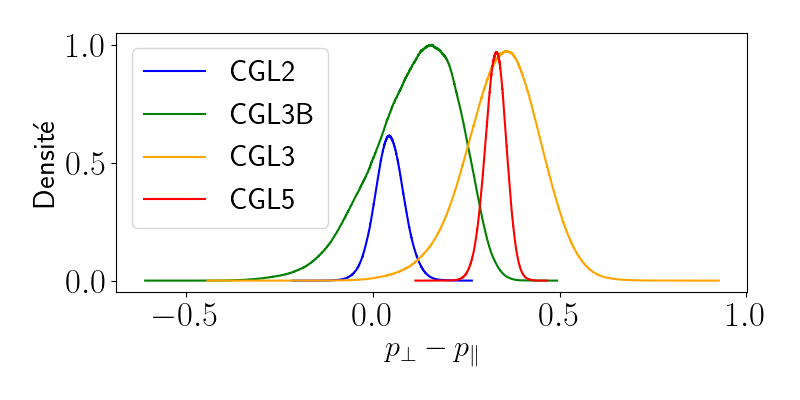

In [102]:
plt.figure('H3',figsize=(8,4))
plt.clf()
labels = ['CGL2','CGL3B','CGL3','CGL5','CGL6']
color = ['blue','green','orange','red','purple']
for i,_ in enumerate(files[:-1]):
    plt.plot((edgess_p[i][:-1]+edgess_p[i][1:])/2,hists_p[i]/np.max(hists[-1]),color=color[i],label=labels[i])
plt.xlabel('$p_{\perp}-p_{\parallel}$')
plt.ylabel('Densité')
#plt.xlim(0,10)
plt.legend()
plt.tight_layout()
plt.show()

In [34]:
labels = ['CGL1','CGL2','CGL3B','CGL3','CGL5','CGL6']
color = ['grey','blue','green','orange','red','purple']

Ri = [15, 20, 20, 10, 10, 70]
lpmperp = [1.2, 2.5, 2, np.nan, np.nan, np.nan]
lpmpar = [20, 80, 6, 2, 4, np.nan]
lrperp = [20, 20, 3, 1, 7, 2]
lrpar =  [100, 80, 8, 10, 30, 5]
Rf = [-3, -0.3, -0.1, 0.9, 2.5, 10]
y = [Ri, lpmperp, lpmpar, lrperp, lrpar, Rf]
ylabels = ['$R_{inert}$', '$\\ell_{\\perp}^{+\\rightarrow -}$', '$\\ell_{\\parallel}^{+\\rightarrow -}$', 
           '$\\ell_{\\perp}^{rise}$', '$\\ell_{\\parallel}^{rise}$', '$R_{forc}$']

sigrho = [0.018, 0.017, 0.043, 0.077, 0.024, 0.025]
beta = [2.96, 2.97, 3.038, 3.14, 3.06, 4.97]
sigbeta = [0.184, 0.159, 0.505, 0.99, 0.31, 0.41]
betai = [0.99, 0.99, 1.03, 1.13, 1.07, 2.98]
sigbetai = [0.068, 0.059, 0.19, 0.39, 0.12, 0.25]
betap = [0.93, 0.93, 0.87, 0.65, 0.63, 1.01]
sigbetap = [0.085, 0.084, 0.18, 0.25, 0.069, 0.15]
ap = [1.106, 1.106, 1.303, 2.155, 2.049, 3.972]
sigap = [0.084, 0.095, 0.303, 0.494, 0.124, 0.474]
apsup = [91, 88, 83, 99.8, 100, 100]
apinf = [9, 12, 17, 0.2, 0, 0]
x = [sigrho, beta, sigbeta, betai, sigbetai, betap, sigbetap, ap, sigap, apsup, apinf]
xlabels = ['$\\sigma_{\\rho}$', '$\\beta_0$', '$\\sigma_{\\beta}$', '$\\beta_{i0}$',
           '$\\sigma_{\\beta_{i}}$', '$\\beta_{\\parallel 0}$', '$\\sigma_{\\beta_{\\parallel}}$',
           '$a_{p0}$', '$\\sigma_{a_{p}}$', '$a_p>1 (\%)$', '$a_p<1 (\%)$',]

In [35]:
plt.figure('C00',figsize=(8,4))
plt.clf()
for i in range(len(x)):
    for j in range(len(y)):
        for k,_ in enumerate(labels):
            plt.scatter(x[i][k],y[j][k],color=color[k],label=labels[k])
        plt.ylabel(ylabels[j])
        plt.xlabel(xlabels[i])
        #plt.legend(ncol = 2)
        plt.tight_layout()
        plt.savefig('./correlations/C'+str(i)+str(j)+'.svg')

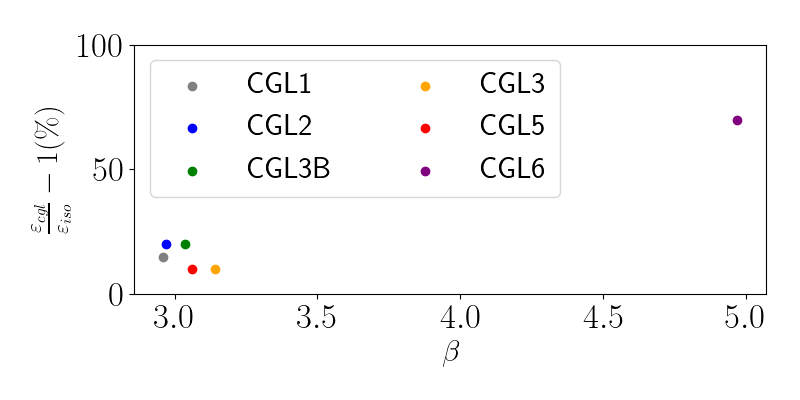

In [24]:
plt.figure('C01',figsize=(8,4))
plt.clf()
y = Ri
x = beta
for i,_ in enumerate(y):
    plt.scatter(x[i],y[i],color=color[i],label=labels[i])
plt.xlabel('$\\beta$')
plt.ylim(0,100)
plt.ylabel('$\\frac{\\varepsilon_{cgl}}{\\varepsilon_{iso}}-1(\%)$')
#plt.xlim(0,10)
plt.legend(ncol = 2)
plt.tight_layout()
plt.show()

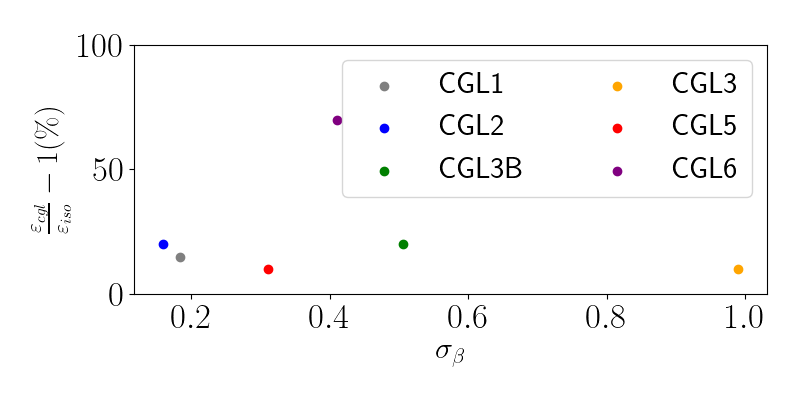

In [25]:
plt.figure('C02',figsize=(8,4))
plt.clf()
y = Ri
x = sigbeta
for i,_ in enumerate(y):
    plt.scatter(x[i],y[i],color=color[i],label=labels[i])
plt.xlabel('$\sigma_{\\beta}$')
plt.ylim(0,100)
plt.ylabel('$\\frac{\\varepsilon_{cgl}}{\\varepsilon_{iso}}-1(\%)$')
#plt.xlim(0,10)
plt.legend(ncol = 2)
plt.tight_layout()
plt.show()

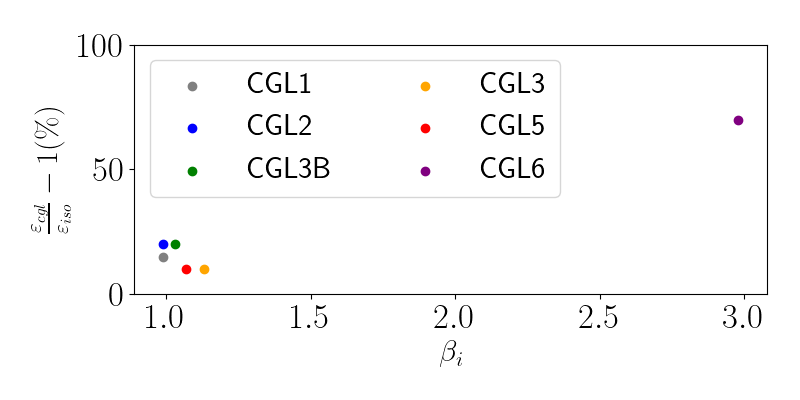

In [26]:
plt.figure('C03',figsize=(8,4))
plt.clf()
y = Ri
x = betai
for i,_ in enumerate(y):
    plt.scatter(x[i],y[i],color=color[i],label=labels[i])
plt.xlabel('$\\beta_i$')
plt.ylim(0,100)
plt.ylabel('$\\frac{\\varepsilon_{cgl}}{\\varepsilon_{iso}}-1(\%)$')
#plt.xlim(0,10)
plt.legend(ncol = 2)
plt.tight_layout()
plt.show()

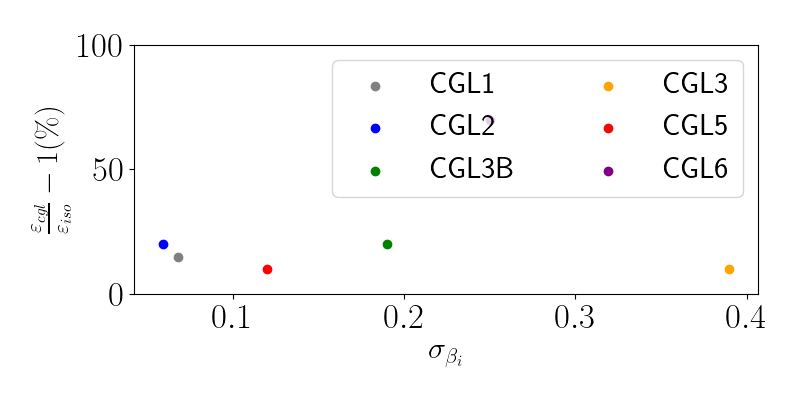

In [27]:
plt.figure('C04',figsize=(8,4))
plt.clf()
y = Ri
x = sigbetai
for i,_ in enumerate(y):
    plt.scatter(x[i],y[i],color=color[i],label=labels[i])
plt.xlabel('$\sigma_{\\beta_i}$')
plt.ylim(0,100)
plt.ylabel('$\\frac{\\varepsilon_{cgl}}{\\varepsilon_{iso}}-1(\%)$')
#plt.xlim(0,10)
plt.legend(ncol = 2)
plt.tight_layout()
plt.show()

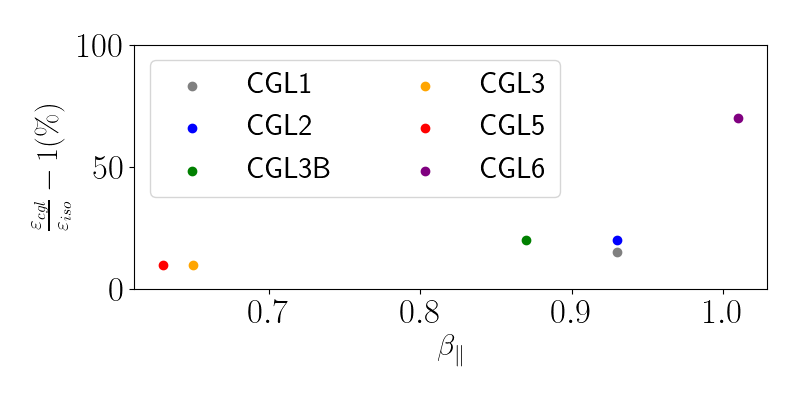

In [31]:
plt.figure('C05',figsize=(8,4))
plt.clf()
y = Ri
x = betap
for i,_ in enumerate(y):
    plt.scatter(x[i],y[i],color=color[i],label=labels[i])
plt.xlabel('$\\beta_{\\parallel}$')
plt.ylim(0,100)
plt.ylabel('$\\frac{\\varepsilon_{cgl}}{\\varepsilon_{iso}}-1(\%)$')
#plt.xlim(0,10)
plt.legend(ncol = 2)
plt.tight_layout()
plt.show()

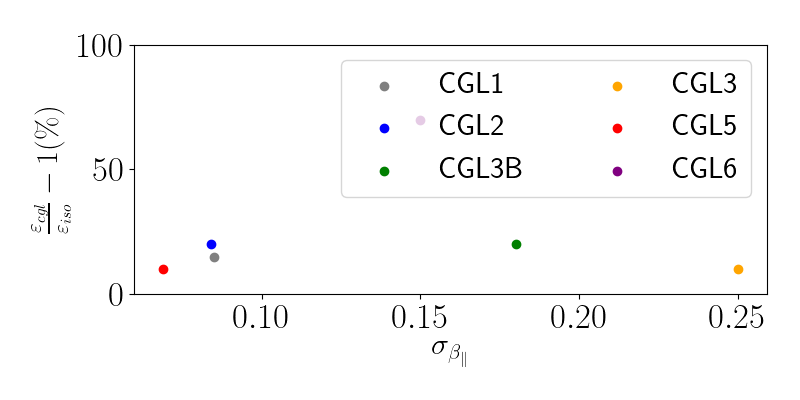

In [30]:
plt.figure('C06',figsize=(8,4))
plt.clf()
y = Ri
x = sigbetap
for i,_ in enumerate(y):
    plt.scatter(x[i],y[i],color=color[i],label=labels[i])
plt.xlabel('$\sigma_{\\beta_{\\parallel}}$')
plt.ylim(0,100)
plt.ylabel('$\\frac{\\varepsilon_{cgl}}{\\varepsilon_{iso}}-1(\%)$')
#plt.xlim(0,10)
plt.legend(ncol = 2)
plt.tight_layout()
plt.show()

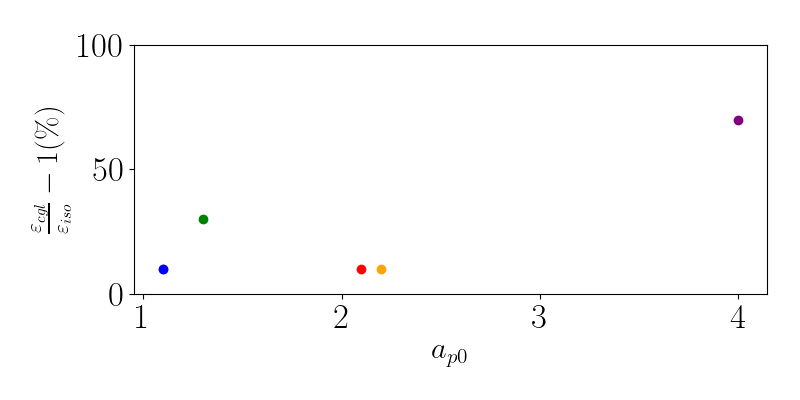

In [18]:
plt.figure('H1',figsize=(8,4))
plt.clf()
labels = ['CGL1','CGL2','CGL3B','CGL3','CGL5','CGL6']
deps = [0.1,0.10,0.30,0.10,0.10,0.7]
apmean = [1.1,1.1,1.3,2.2,2.1,4]
for i,_ in enumerate(deps):
    plt.scatter(apmean[i],deps[i]*100,color=color[i],label=labels[i])
plt.xlabel('$a_{p0}$')
plt.ylim(0,100)
plt.ylabel('$\\frac{\\varepsilon_{cgl}}{\\varepsilon_{iso}}-1(\%)$')
#plt.xlim(0,10)
#plt.legend(ncol = 2)
plt.tight_layout()
plt.show()

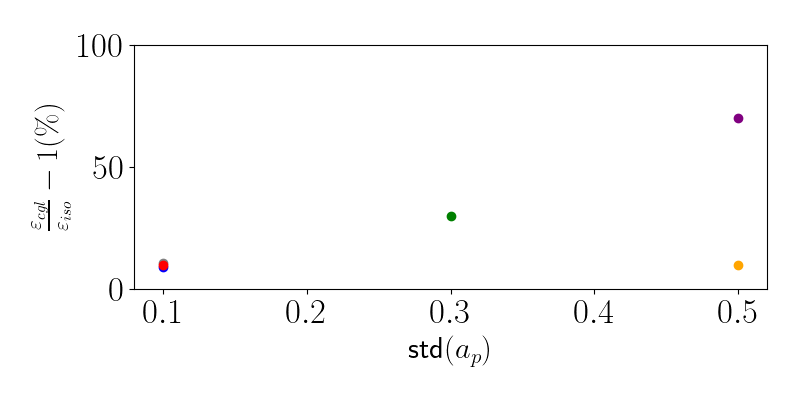

In [31]:
plt.figure('H2',figsize=(8,4))
plt.clf()
labels = ['CGL1','CGL2','CGL3B','CGL3','CGL5','CGL6']
deps = [0.11,0.09,0.30,0.10,0.10,0.7]#[0.26,0.47,0.14,0.13,0.72]
apmean = [0.1,0.1,0.3,0.5,0.1,0.5]
for i,_ in enumerate(deps):
    plt.scatter(apmean[i],deps[i]*100,color=color[i],label=labels[i])
plt.xlabel('std$(a_{p})$')
plt.ylim(0,100)
plt.ylabel('$\\frac{\\varepsilon_{cgl}}{\\varepsilon_{iso}}-1(\%)$')
#plt.xlim(0,10)
#plt.legend()
plt.tight_layout()
plt.show()

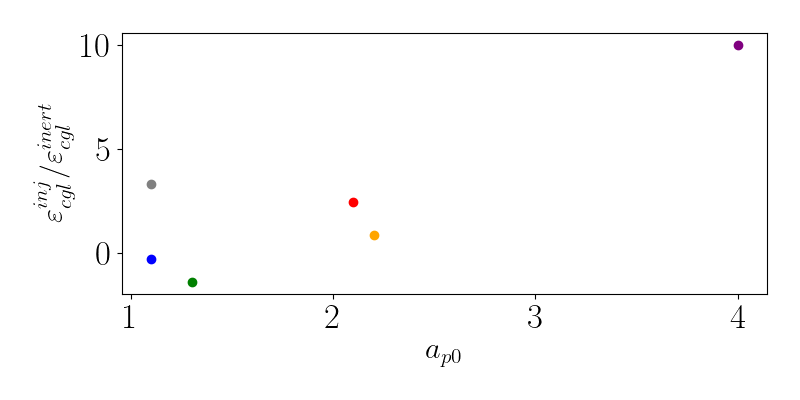

In [17]:
plt.figure('H3',figsize=(8,4))
plt.clf()
labels = ['CGL1','CGL2','CGL3B','CGL3','CGL5','CGL6']
color = ['grey','blue','green','orange','red','purple']
deps = [-2e-6/-6e-7,-7e-7/2.5e-6,-6e-5/4.3e-5,0.00025/0.00028,7.4e-6/3e-6,0.00016/1.6e-5]
apmean = [1.1,1.1,1.3,2.2,2.1,4]
for i,_ in enumerate(labels):
    plt.scatter(apmean[i],deps[i],color=color[i],label=labels[i])
plt.xlabel('$a_{p0}$')
plt.ylabel('$\\varepsilon^{inj}_{cgl}/\\varepsilon^{inert}_{cgl}$')
#plt.xlim(0,10)
#plt.legend(ncol = 2, loc='upper left')
plt.tight_layout()
plt.show()

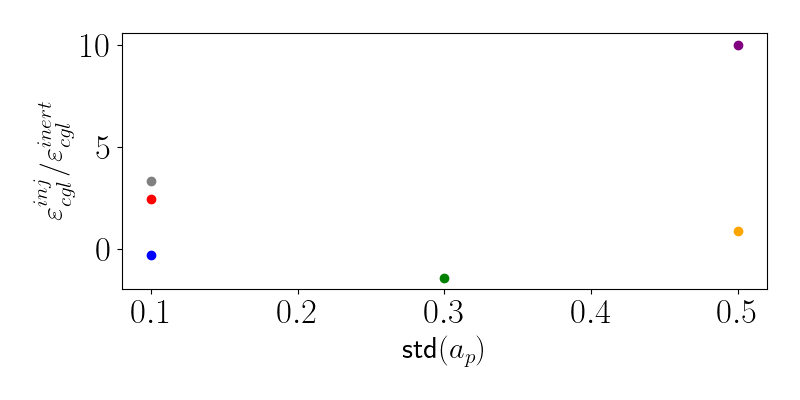

In [10]:
plt.figure('H4',figsize=(8,4))
plt.clf()
labels = ['CGL1','CGL2','CGL3B','CGL3','CGL5','CGL6']
color = ['grey','blue','green','orange','red','purple']
deps = [-2e-6/-6e-7,-7e-7/2.5e-6,-6e-5/4.3e-5,0.00025/0.00028,7.4e-6/3e-6,0.00016/1.6e-5]
apstd = [0.1,0.1,0.3,0.5,0.1,0.5]
for i,_ in enumerate(labels):
    plt.scatter(apstd[i],deps[i],color=color[i],label=labels[i])
plt.xlabel('std$(a_{p})$')
plt.ylabel('$\\varepsilon^{inj}_{cgl}/\\varepsilon^{inert}_{cgl}$')
#plt.xlim(0,10)
#plt.legend(ncol = 2, loc='upper left')
plt.tight_layout()
plt.show()

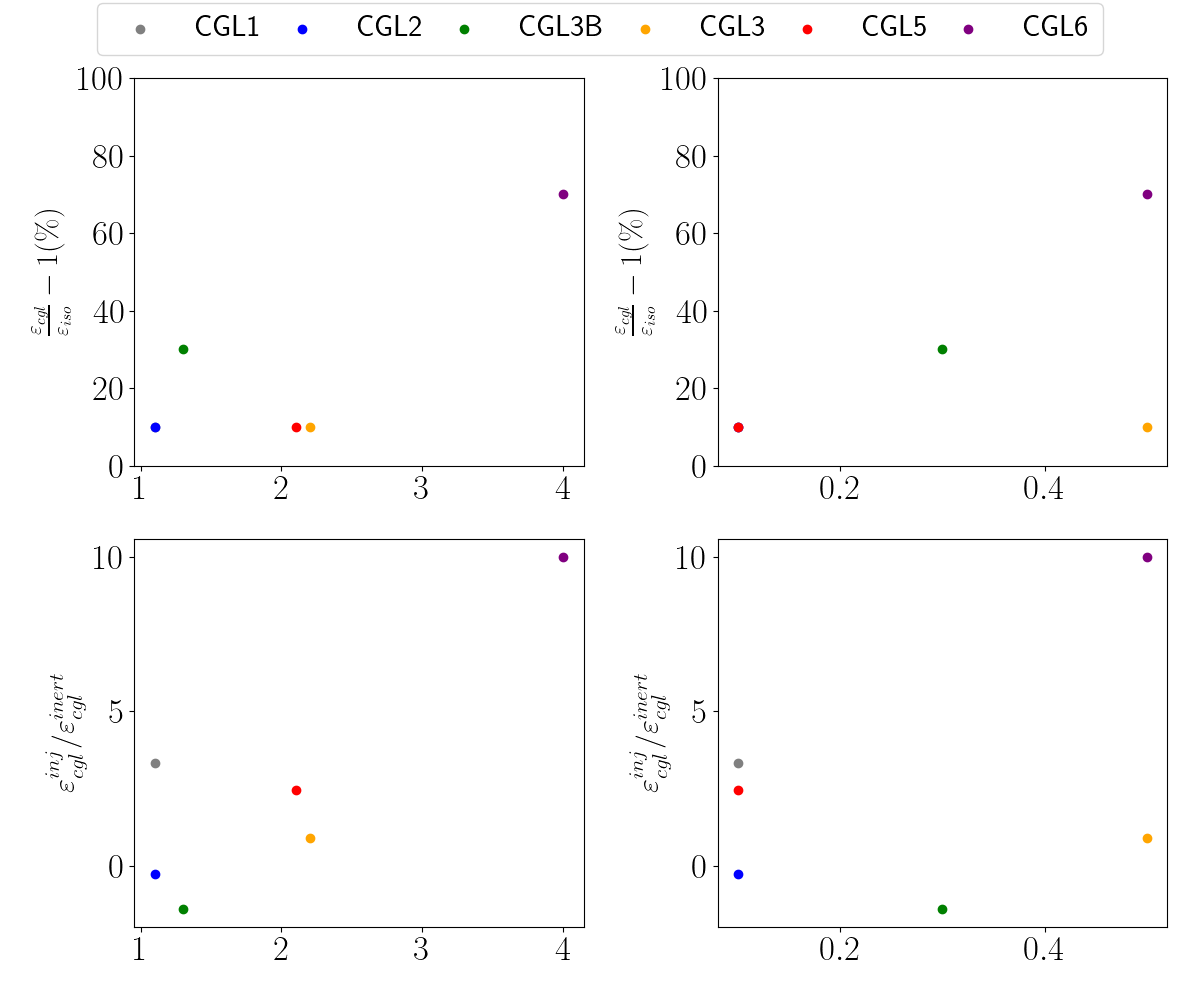

In [22]:

labels = ['CGL1','CGL2','CGL3B','CGL3','CGL5','CGL6']
color = ['grey','blue','green','orange','red','purple']
depsfi = [-2e-6/-6e-7,-7e-7/2.5e-6,-6e-5/4.3e-5,0.00025/0.00028,7.4e-6/3e-6,0.00016/1.6e-5]
apstd = [0.1,0.1,0.3,0.5,0.1,0.5]
deps = [0.1,0.10,0.30,0.10,0.10,0.7]
apmean = [1.1,1.1,1.3,2.2,2.1,4]
plt.figure('G', figsize=(12,10))
plt.clf()
plt.suptitle('')
plt.subplot(221)
for i,_ in enumerate(deps):
    plt.scatter(apmean[i],deps[i]*100,color=color[i],label=labels[i])
#plt.xlabel('$a_{p0}$')
plt.ylim(0,100)
plt.ylabel('$\\frac{\\varepsilon_{cgl}}{\\varepsilon_{iso}}-1(\%)$')
plt.subplot(222)
for i,_ in enumerate(deps):
    plt.scatter(apstd[i],deps[i]*100,color=color[i],label=labels[i])
#plt.xlabel('std$(a_{p})$')
plt.ylim(0,100)
plt.ylabel('$\\frac{\\varepsilon_{cgl}}{\\varepsilon_{iso}}-1(\%)$')
plt.subplot(223)
for i,_ in enumerate(labels):
    plt.scatter(apmean[i],depsfi[i],color=color[i],label=labels[i])
#plt.xlabel('$a_{p0}$')
plt.ylabel('$\\varepsilon^{inj}_{cgl}/\\varepsilon^{inert}_{cgl}$')
plt.subplot(224)
l=[]
for i,_ in enumerate(labels):
    l.append(plt.scatter(apstd[i],depsfi[i],color=color[i],label=labels[i]))
#plt.xlabel('std$(a_{p})$')
plt.ylabel('$\\varepsilon^{inj}_{cgl}/\\varepsilon^{inert}_{cgl}$')

plt.figlegend( l,labels, loc = 'upper center', borderaxespad=0.1, ncol=6, labelspacing=0,columnspacing=0.3,bbox_to_anchor=(0.5, 1) ) 
plt.tight_layout()
plt.show()
